# House Price Prediction

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
train = pd.read_csv('../../Dataset/House Prediction/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
for i in train.columns:
    if train[i].dtype == 'object':
        print 'Feature: {}, Number Of Unique Features: {}'.format(i,len(train[i].unique()))

Feature: MSZoning, Number Of Unique Features: 5
Feature: Street, Number Of Unique Features: 2
Feature: Alley, Number Of Unique Features: 3
Feature: LotShape, Number Of Unique Features: 4
Feature: LandContour, Number Of Unique Features: 4
Feature: Utilities, Number Of Unique Features: 2
Feature: LotConfig, Number Of Unique Features: 5
Feature: LandSlope, Number Of Unique Features: 3
Feature: Neighborhood, Number Of Unique Features: 25
Feature: Condition1, Number Of Unique Features: 9
Feature: Condition2, Number Of Unique Features: 8
Feature: BldgType, Number Of Unique Features: 5
Feature: HouseStyle, Number Of Unique Features: 8
Feature: RoofStyle, Number Of Unique Features: 6
Feature: RoofMatl, Number Of Unique Features: 8
Feature: Exterior1st, Number Of Unique Features: 15
Feature: Exterior2nd, Number Of Unique Features: 16
Feature: MasVnrType, Number Of Unique Features: 5
Feature: ExterQual, Number Of Unique Features: 4
Feature: ExterCond, Number Of Unique Features: 5
Feature: Founda

In [5]:
for i in train.columns:
    if train[i].dtype == 'object':
        print 'Changing {} to continous'.format(i)
        train[i] = train[i].astype('category').cat.codes

Changing MSZoning to continous
Changing Street to continous
Changing Alley to continous
Changing LotShape to continous
Changing LandContour to continous
Changing Utilities to continous
Changing LotConfig to continous
Changing LandSlope to continous
Changing Neighborhood to continous
Changing Condition1 to continous
Changing Condition2 to continous
Changing BldgType to continous
Changing HouseStyle to continous
Changing RoofStyle to continous
Changing RoofMatl to continous
Changing Exterior1st to continous
Changing Exterior2nd to continous
Changing MasVnrType to continous
Changing ExterQual to continous
Changing ExterCond to continous
Changing Foundation to continous
Changing BsmtQual to continous
Changing BsmtCond to continous
Changing BsmtExposure to continous
Changing BsmtFinType1 to continous
Changing BsmtFinType2 to continous
Changing Heating to continous
Changing HeatingQC to continous
Changing CentralAir to continous
Changing Electrical to continous
Changing KitchenQual to contin

In [6]:
for i in train.columns:
    if train[i].dtype == 'object':
        print 'Object data found in {}'.format(i)

In [7]:
train = train.fillna(method='ffill')

In [8]:
train.isnull().values.any()

False

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000


In [10]:
y = train.pop('SalePrice')
print y.shape

(1460,)


In [11]:
from sklearn.linear_model import LinearRegression

## Univariate Linear Regression
### Considering each predictor separately

In [12]:
def SimpleLinerRegression(X,y):
    linear = LinearRegression()
    linear.fit(X,y)
    return (linear.coef_,linear.intercept_)

In [13]:
coeff,intercept = SimpleLinerRegression(train.MSSubClass.values.reshape(-1,1),y)

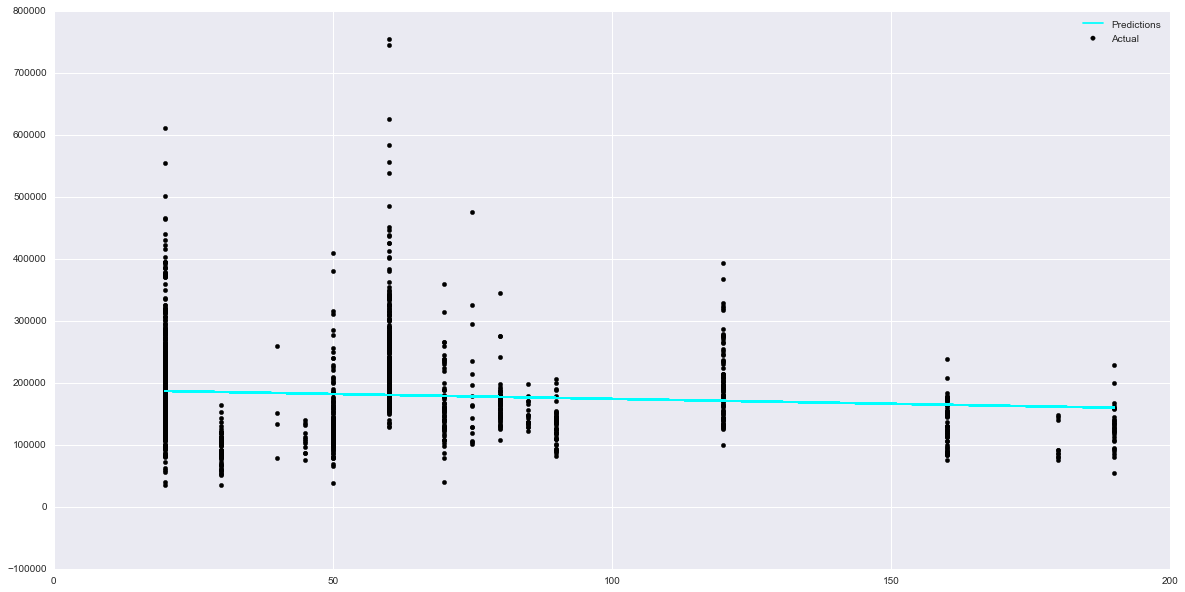

In [14]:
plt.plot(train.MSSubClass,intercept+coeff*train.MSSubClass.values,c='cyan',label='Predictions')
plt.scatter(x=train.MSSubClass,y=y,label='Actual',c='black')
plt.legend()
plt.show()

In [19]:
params = {}
tss = np.sqrt(sum((y.values.reshape(-1,1) - np.mean(y.values))**2))
for col in train.columns[1:]:
    X = train[col].values.reshape(-1,1)
    coeff,intercept = SimpleLinerRegression(X,y)
    rss = np.sqrt(sum((y.values.reshape(-1,1) - (intercept + coeff*X))**2))
    rsquared = (1-(rss/tss))
    params[col] = [coeff[0],intercept,rss,rsquared]

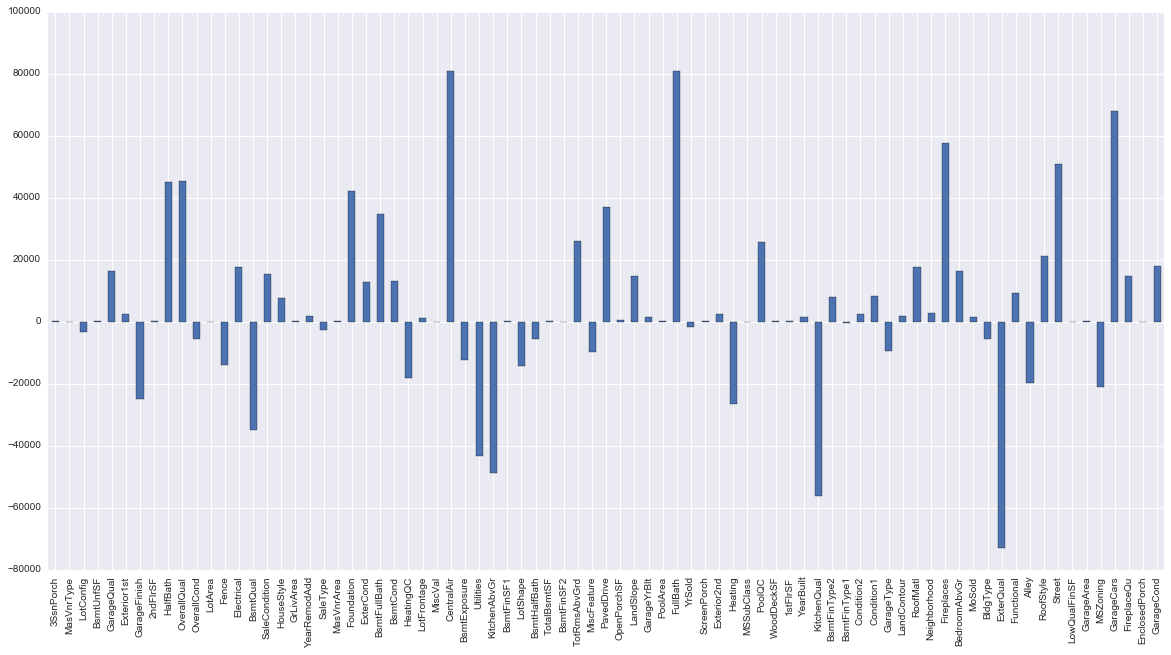

In [20]:
## Coefficient
coeffs = pd.Series([i[0] for i in params.values()],index=params.keys())
coeffs.plot(kind='bar')

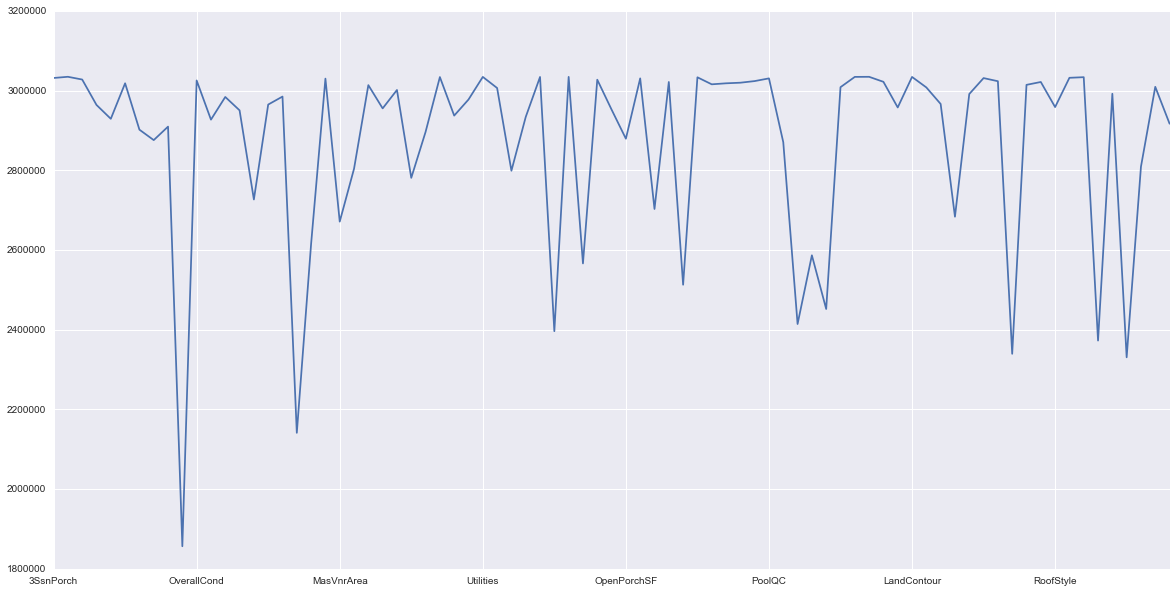

In [21]:
## RSS
errors = pd.Series([i[2] for i in params.values()],index=params.keys())
errors.plot()

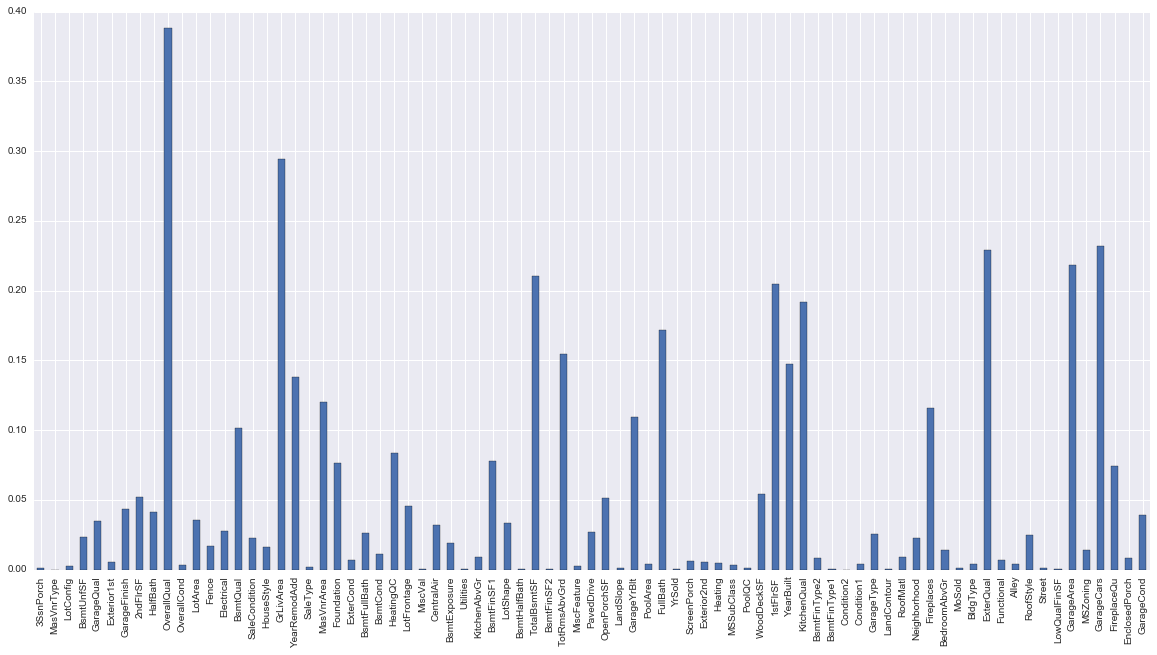

In [22]:
## R Squared
rvalues = pd.Series([i[3] for i in params.values()],index=params.keys())
rvalues.plot(kind='bar')

## Multivariate Linear Regression
### Considering all the predictors simultaneously

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,0,-1,-1,-1,0,2,2008,8,4
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,0,-1,-1,-1,0,5,2007,8,4
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,0,-1,-1,-1,0,9,2008,8,4
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,0,-1,-1,-1,0,2,2006,8,0
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,0,-1,-1,-1,0,12,2008,8,4


In [24]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = StandardScaler().fit(train).transform(train)
print X.shape

(1460, 80)


In [28]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
coefficients = model.coef_
intercept = model.intercept_
print coefficients.shape

(80,)


In [51]:
rss = np.sqrt(sum((y.values - (intercept + np.dot(X,coefficients)))**2))
print 'Residual Squared Sum: {}'.format(round(rss,3))

Residual Squared Sum: 1099400.114


In [52]:
tss = np.sqrt(sum((y.values - np.mean(y.values))**2))
print 'Total Squared Sum: {}'.format(tss)

Total Squared Sum: 3034454.04226


In [54]:
print 'R-squared Coefficient: {}'.format(1-(rss/tss))

R-squared Coefficient: 0.637694261081


In [57]:
n,p = X.shape
print 'F Score: {}'.format(((tss-rss)/p)/(rss/(n-p-1)))

F Score: 30.3397204201
